In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter

# Preprocessing Functions
These functions will modify the frames of the video image in order to separate each well into a different image that can be investigated and not cause interference between reading each well. 

# Try using the test lepton images - convert to array and section off there 

# Inputs for all functions

* until we obtain a frame from a video as a test image - I will be using a set of drawn well plates with varying degrees of tilt to test the boundry definition and tiling. 

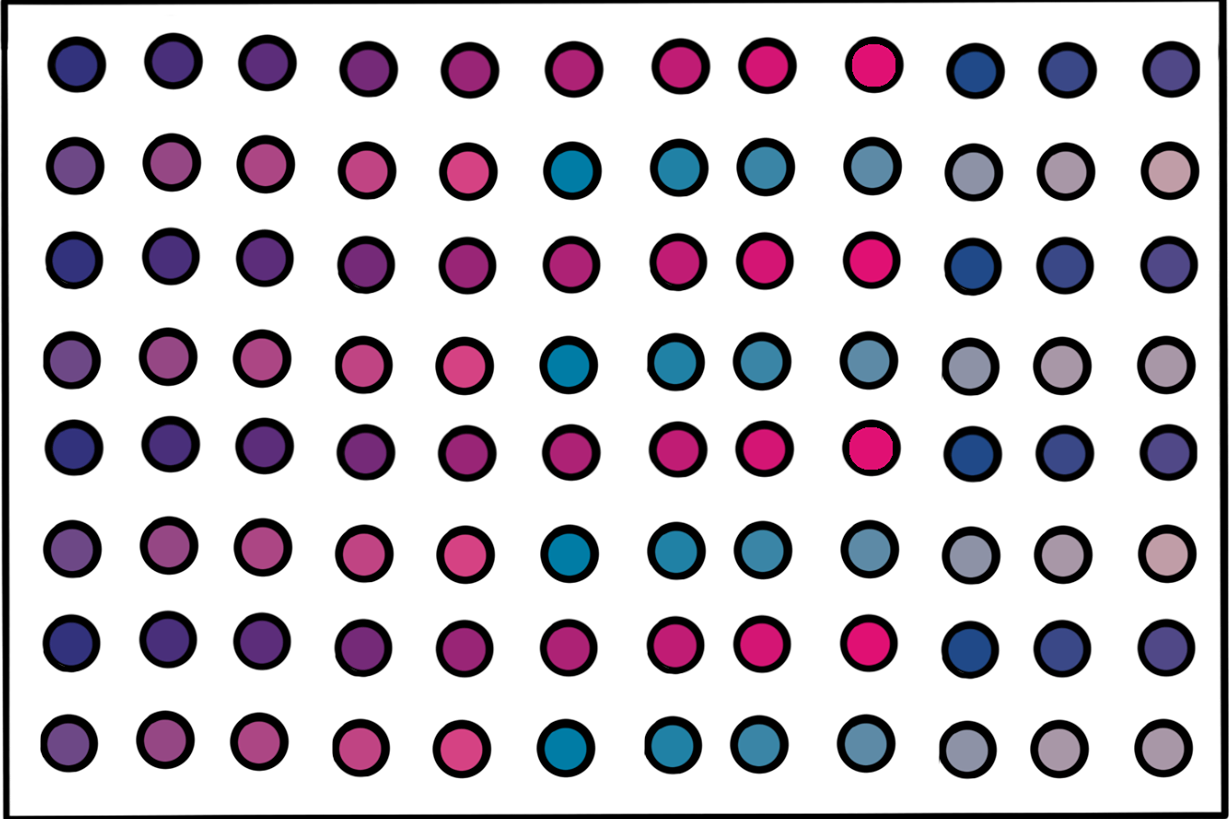

In [45]:
image = Image.open('../doc/Wellplatedrawn_cropman.png') 
image

## Preprocessing 1: Boundry definition
This will cut out the well plate from the background of the frame - the well plate dimensions should not change so no further modifications will be needed to ensure the cuts are in the correct places. 

## Preprocessing 2: Tiling each well into a seperate image
In order to ensure that there is not temperature spill over from other frames we will tile the single frame in to 96 separate images - this will allow each frame to be read as 96 individual temperatures. 

#### Steps
* Assign data to each image (image number running left to right then wrapping to begining/ frame data (if available)/ temp (when recieved))
* Stack images into an array that describes the entire frame
* Loads stacked images into arrays (?)
* Wrapper for all functions

### Finding data about the image

In [46]:
width, height = image.size
print(width)
print(height)

1229
819


In [47]:
tilewidth = width/12
tileheight = height / 8
tilesize = [tilewidth, tileheight]
print(tilesize)

[102.41666666666667, 102.375]


### Cropping a single image into 96 sections

In [48]:
def crop(image, height, width):


SyntaxError: unexpected EOF while parsing (<ipython-input-48-82ad5c853eaa>, line 1)

In [54]:
for i in range(int(height // tileheight)):
    for j in range(int(width // tilewidth)):
        #print(i,j)
        box = (j*tilewidth, i*tileheight, (j+1)*tilewidth, (i+1)*tileheight)
        image.crop(box)

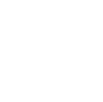

In [55]:
image

### Saving Image Data 

### 

### Soft: User modiciations
While we are using the 96 well plates for this experiment, there are many different sizes of well plates that will need to be accounted for. This will change the tiling and the sizes of the tiles in order to accomodate the change in wells. Our specific robot is designed with 96 well plates in mind although custom containers can be added with different specificiations. 

#### Common well plate specifications
* 96 well plate (2:3 rectangular mix - 8x12)
* 384 well plate (2:3 rectanguar mix - 16x24)
* 24 well plate (3x6)
